In [1]:
import os
os.getcwd()

'd:\\hardhat\\KAGGLE\\NLP Disaster Tweets'

Starting training...
Training completed!
Validation Accuracy: 0.7800393959290873
Validation F1 Score: 0.7304907481898633


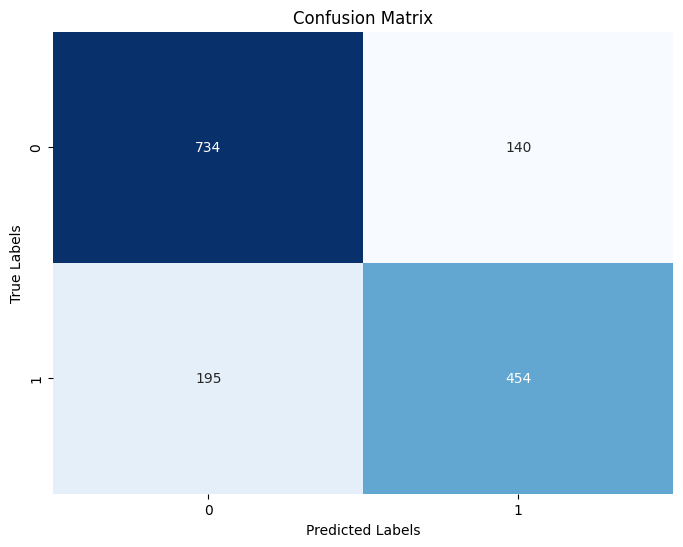

Submission file created!


In [2]:
import pandas as pd # type: ignore
import numpy as np# type: ignore
import matplotlib.pyplot as plt# type: ignore
import seaborn as sns# type: ignore
from sklearn.metrics import confusion_matrix, classification_report# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
from sklearn.feature_extraction.text import TfidfVectorizer# type: ignore
from sklearn.pipeline import Pipeline# type: ignore
from sklearn.linear_model import LogisticRegression# type: ignore
from sklearn.metrics import accuracy_score, f1_score# type: ignore
import joblib # type: ignore

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Fill missing values
train['keyword'].fillna('', inplace=True)
train['location'].fillna('', inplace=True)
test['keyword'].fillna('', inplace=True)
test['location'].fillna('', inplace=True)

# Combine text, keyword, and location for better context
train['text'] = train['text'] + ' ' + train['keyword'] + ' ' + train['location']
test['text'] = test['text'] + ' ' + test['keyword'] + ' ' + test['location']

# Split the data
X = train['text']
y = train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])

# Train the model
print('Starting training...')
pipeline.fit(X_train, y_train)
print('Training completed!')

joblib.dump(pipeline, 'nlp_model_pipeline.pkl')

# Evaluate the model
y_pred = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy}')
print(f'Validation F1 Score: {f1}')

# Predict on the test set
test_predictions = pipeline.predict(test['text'])

# Prepare the submission file
#submission = sample_submission.copy()
#submission['target'] = test_predictions
#submission.to_csv('submission.csv', index=False)
# Assuming y_val and y_pred are already defined from your previous code
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print('Submission file created!')
